In [1]:
# Import data
import pandas as pd

data=pd.read_csv('data.csv',header=None)
data.columns=['label','review','content']
data

,label,review,content
0,2,Stuning even for the non-gamer,This sound track was beautiful! It paints the ...
1,2,The best soundtrack ever to anything.,I'm reading a lot of reviews saying that this ...
2,2,Amazing!,This soundtrack is my favorite music of all ti...
3,2,Excellent Soundtrack,I truly like this soundtrack and I enjoy video...
4,2,"Remember, Pull Your Jaw Off The Floor After He...","If you've played the game, you know how divine..."
...,...,...,...
19996,1,Tedious collection of stories about a goat.,"If you are like me, and thought the anthologie..."
19997,1,Disappointed,I love the 1632 series. I have bought every bo...
19998,1,Pretty Disappointing,I have to say that after becoming immersed in ...
19999,1,Far and away the most boring book in the series,"I have every single Ring Of Fire book, and in ..."


<Axes: >

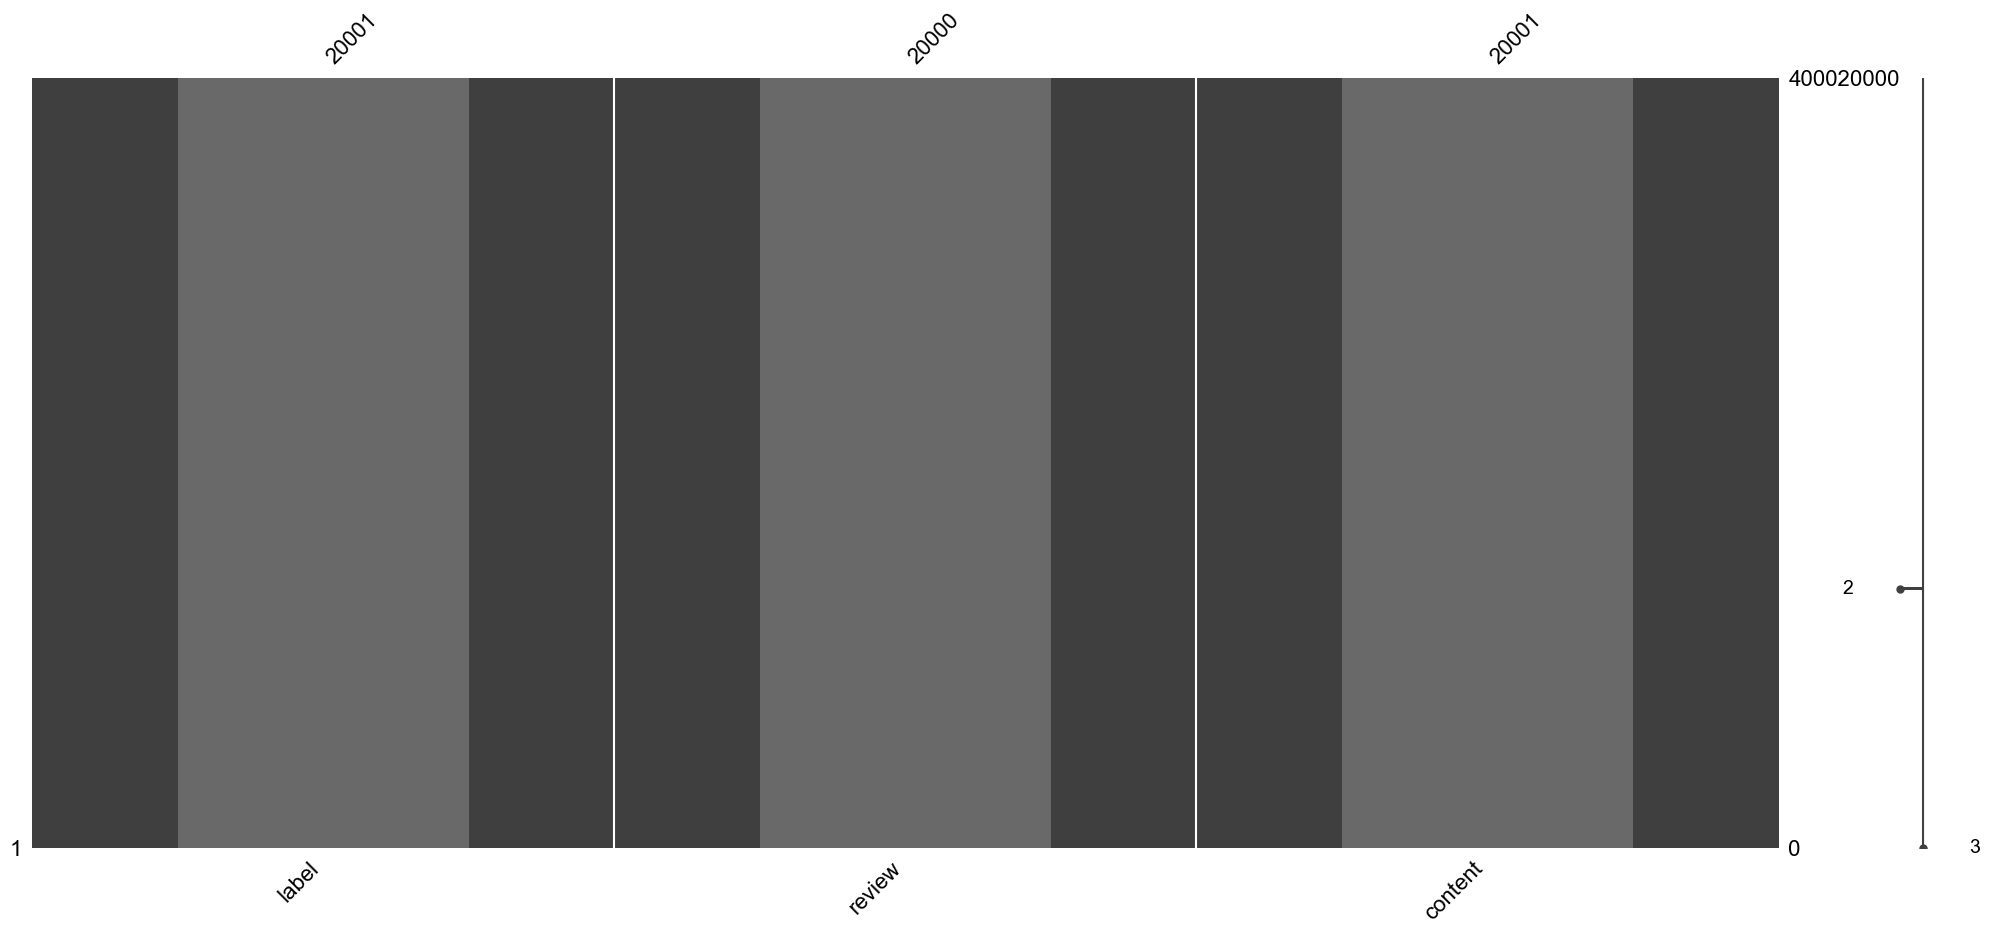

In [2]:
# Counting missing values
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
import missingno as msn
msn.matrix(data, labels = False, label_rotation = 90)

msn.bar(data)

In [3]:
# Delete missing values
data=data.dropna()

In [4]:
# checking for any duplicate in the data
data.duplicated().sum()

0

/Users/haha/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/haha/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/haha/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0.5, 0, 'label')

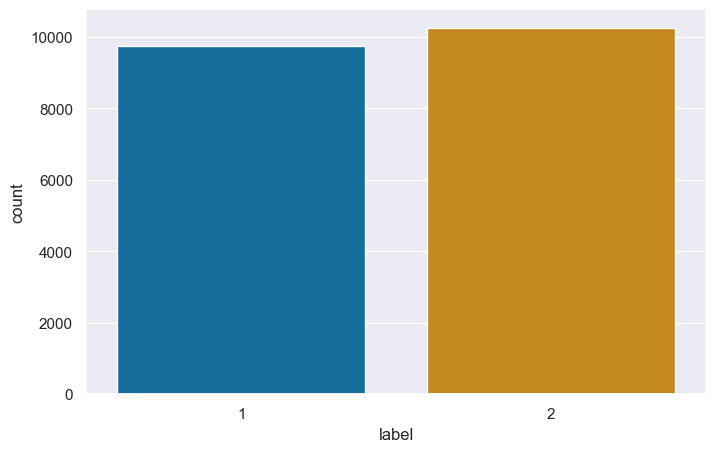

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.set(style='darkgrid',context='notebook',font_scale=1.0,palette='colorblind') 
sns.countplot(x ='label',data = data)
plt.xticks(rotation = 0)
plt.ylabel('count')
plt.xlabel('label')


array([[<Axes: title={'center': 'label'}>]], dtype=object)

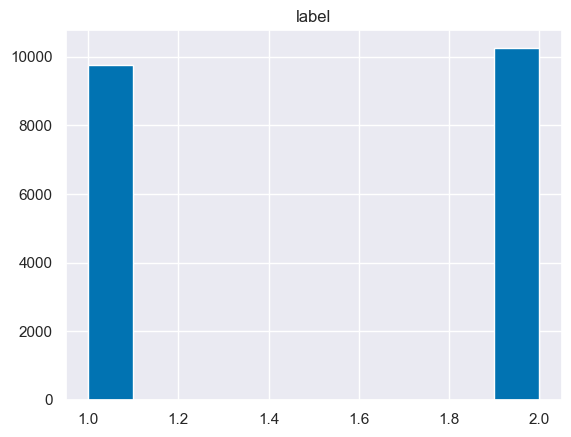

In [6]:
data.hist()

Text(0, 0.5, 'Length')

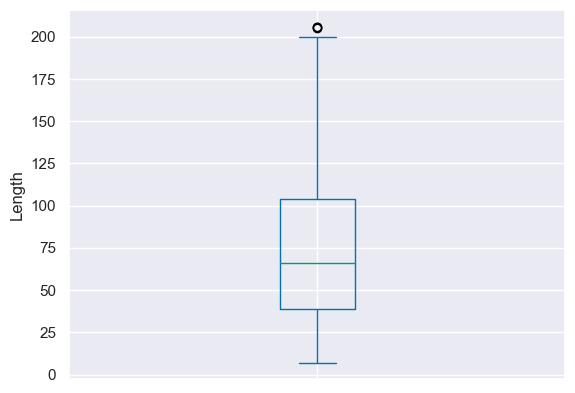

In [7]:
# Box chart analyzes text length
length = pd.Series([len(review.split()) for review in data["content"]])
length.plot(kind="box")
plt.ylabel("Length")

/Users/haha/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/var/folders/cl/1l88k2ws53d9m74kc6ljmcn40000gn/T/ipykernel_46347/556003951.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(length,palette="deep")
/Users/haha/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0, 0.5, 'count')

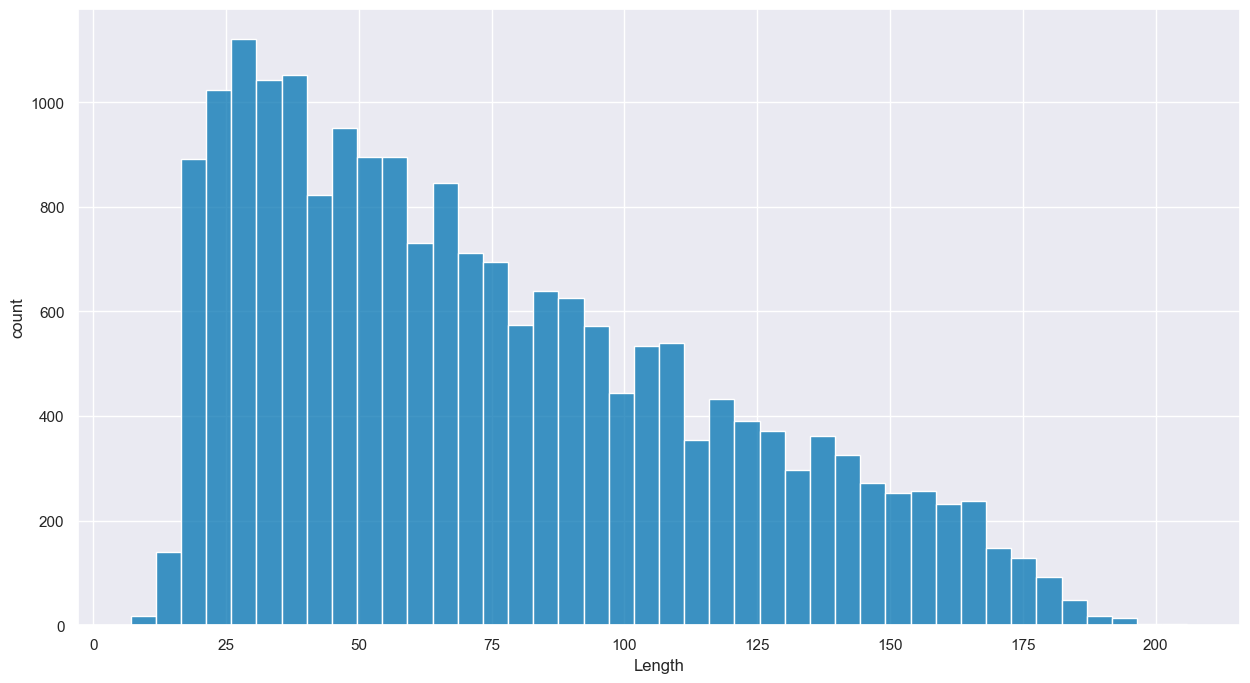

In [8]:
# Histogram analysis text length
plt.figure(figsize=(15,8))
sns.histplot(length,palette="deep")
plt.xlabel("Length")
plt.ylabel("count")

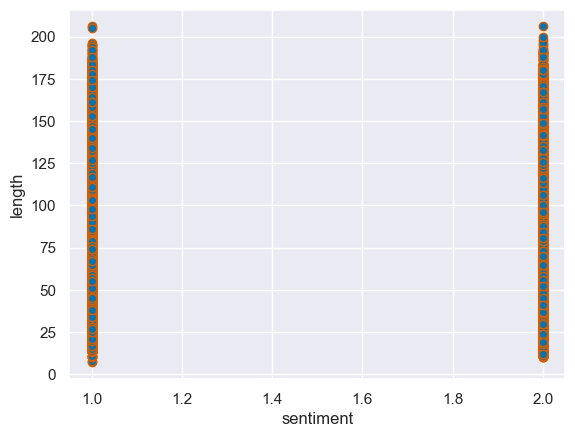

In [9]:
import matplotlib.pyplot as plt
import pandas as pd


y = list(length)
x= list(data['label'])

color = ['c', 'b', 'g', 'r', 'm', 'y', 'k', 'w']

plt.scatter(x, y, c=color[1], edgecolors='r')
plt.xlabel('sentiment')
plt.ylabel('length')
plt.show()

In [10]:
# Text cleaning

In [11]:

from nltk.stem.wordnet import WordNetLemmatizer
from nltk import word_tokenize
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
import re, string, nltk
import emoji, bz2

with open('stopwords.txt',encoding='utf-8') as file:
        
        content=file.readlines()
    
qq=[]
for line in content:
    line=line.replace('\n','')
    line=str(line)
    qq.append(line)

content=qq

import warnings
warnings.filterwarnings("ignore")

lemmatizer = WordNetLemmatizer()
i=0

def classification(data,name):
    a=list(data[name].unique())
    b=[]
    c=list(data[name])
    for i in c:
        judge=False
        for j in range(len(a)):
            if a[j]==i:
                b.append(j)
                judge=True
        if judge== False:
            b.append(len(a))
  
    data=data.drop(columns=[name])
    data.insert(loc=0, column=name, value=b)
    return data

def preprocess_text(text):
    text = re.sub(r"won\'t", "will not", text)
    text = re.sub(r"can\'t", "can not", text)
    text = re.sub('[^a-zA-Z0-9]',' ',text)
    text = [word for word in text.split() if not word in content]
    text = ' '.join(text)
    return text

data["cleaned_content"] = data["content"].apply(preprocess_text)

data

,label,review,content,cleaned_content
0,2,Stuning even for the non-gamer,This sound track was beautiful! It paints the ...,sound track beautiful paints senery mind recom...
1,2,The best soundtrack ever to anything.,I'm reading a lot of reviews saying that this ...,reading reviews game soundtrack figured write ...
2,2,Amazing!,This soundtrack is my favorite music of all ti...,soundtrack favorite music hands intense sadnes...
3,2,Excellent Soundtrack,I truly like this soundtrack and I enjoy video...,soundtrack enjoy video game music played game ...
4,2,"Remember, Pull Your Jaw Off The Floor After He...","If you've played the game, you know how divine...",played game divine music single song story gam...
...,...,...,...,...
19996,1,Tedious collection of stories about a goat.,"If you are like me, and thought the anthologie...",anthologies series Then bother book anthology ...
19997,1,Disappointed,I love the 1632 series. I have bought every bo...,love 1632 series book enjoyed immensely normal...
19998,1,Pretty Disappointing,I have to say that after becoming immersed in ...,immersed 1632 enjoying 1633 pretty abandoned p...
19999,1,Far and away the most boring book in the series,"I have every single Ring Of Fire book, and in ...",single Ring Of Fire book series favorite sci E...


Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/cl/1l88k2ws53d9m74kc6ljmcn40000gn/T/jieba.cache
Loading model cost 0.263 seconds.
Prefix dict has been built successfully.


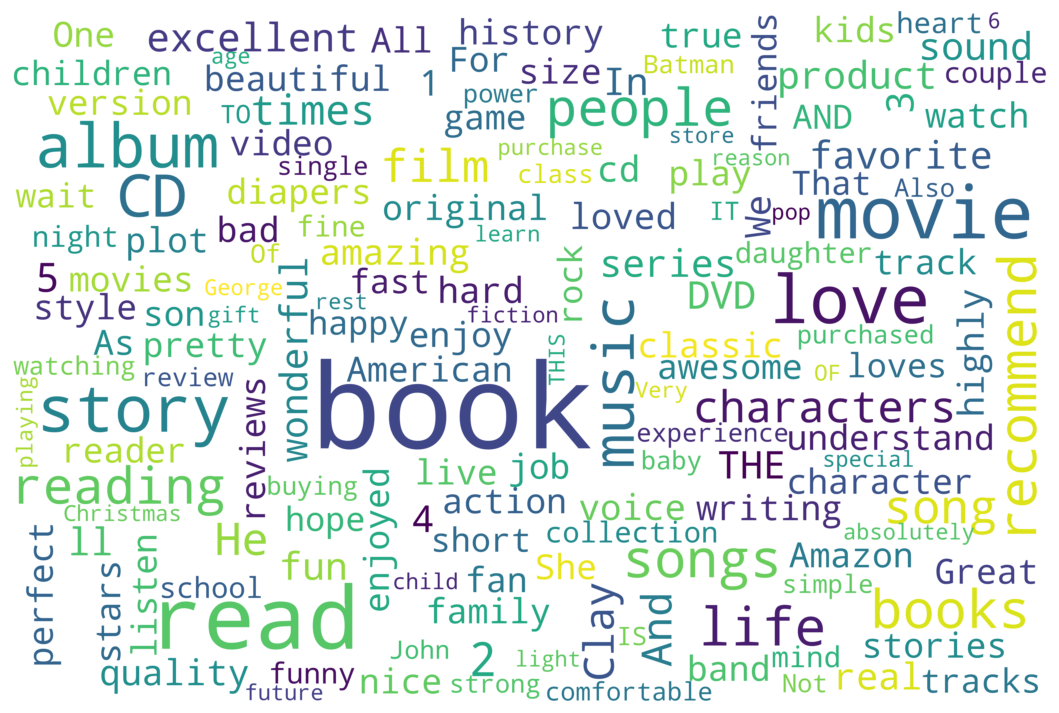

In [12]:
# Map positive text words
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import csv
import jieba
import collections
import re
from wordcloud import WordCloud
from imageio import imread
from collections import Counter

df=data
df = df[df["label"] ==2]

df=list(df['cleaned_content'])
text=''
for i in df:
    text+=str(i)
data_cut = jieba.lcut(text,cut_all=False) 

word_counts = collections.Counter(data_cut)
# print(word1)
word_counts_top50 = word_counts.most_common(500) 

my_cloud = WordCloud(
    background_color='white',  
    width=900, height=600,
    max_words=200,            
    scale=10,           
 
    max_font_size=200,        
    min_font_size=16,        
    random_state=500,
    # mask=bg_pic  
).generate_from_frequencies(word_counts)


fig, ax1 = plt.subplots(figsize=(16,9))
plt.imshow(my_cloud, interpolation='bilinear')

plt.axis('off')
plt.show()

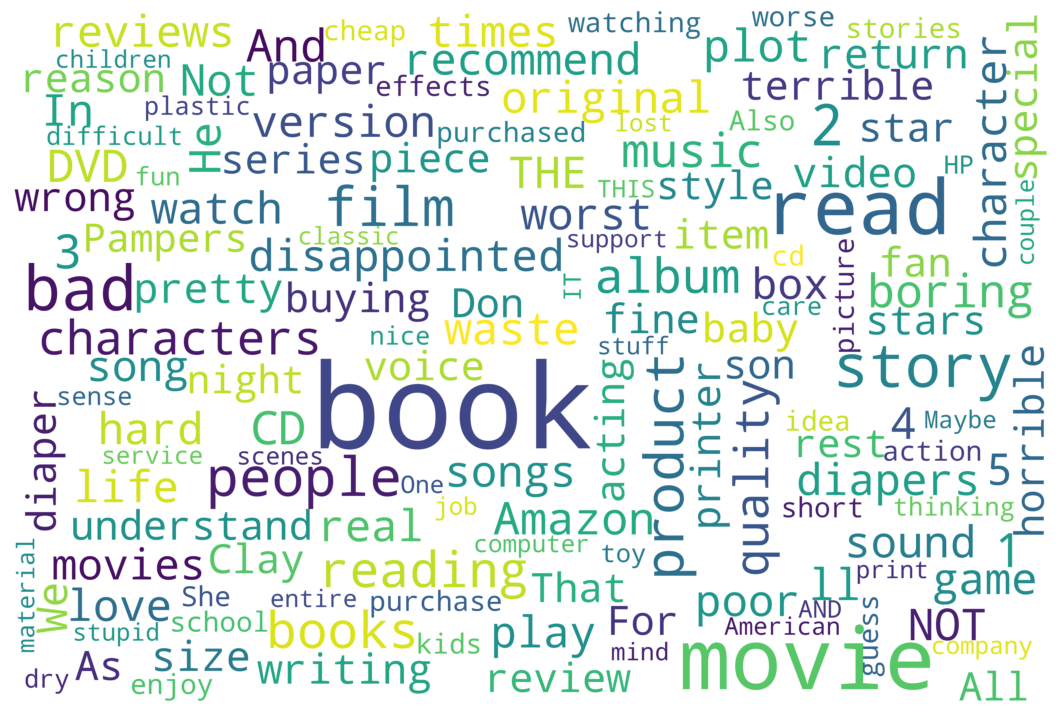

In [13]:
# Draw a negative text word map
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import csv
import jieba
import collections
import re
from wordcloud import WordCloud
from imageio import imread
from collections import Counter

df=data
df = df[df["label"] ==1]

df=list(df['cleaned_content'])
text=''
for i in df:
    text+=str(i)
data_cut = jieba.lcut(text,cut_all=False) 

word_counts = collections.Counter(data_cut)
# print(word1)
word_counts_top50 = word_counts.most_common(500) 

my_cloud = WordCloud(
    background_color='white',  
    width=900, height=600,
    max_words=200,            
    scale=10,           
 
    max_font_size=200,        
    min_font_size=16,        
    random_state=500,
    # mask=bg_pic  
).generate_from_frequencies(word_counts)


fig, ax1 = plt.subplots(figsize=(16,9))
plt.imshow(my_cloud, interpolation='bilinear')

plt.axis('off')
plt.show()

In [14]:
# Data conversion

In [15]:
import re
from gensim.models import word2vec
from scipy import spatial
import pandas as pd
import re
import numpy as np
import jieba
import jieba.analyse as analyse
import csv
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.metrics import recall_score,accuracy_score
from sklearn.metrics import f1_score

from sklearn.metrics import roc_curve, auc
import seaborn as sns

from sklearn.tree import  DecisionTreeClassifier

from sklearn.metrics import confusion_matrix
import sklearn
import time

In [16]:

df=list(data['cleaned_content'])
text=''
for i in df:
    text+=str(i)
seg = jieba.lcut(text,cut_all=False)
# Build the word2vec model, which is used to transform word vectors
model = word2vec.Word2Vec(seg, min_count=3,vector_size=100)
index2word_set = set(model.wv.index_to_key)

In [17]:
def avg_feature_vector(sentence, model, num_features, index2word_set):
    feature_vec = np.zeros((num_features, ), dtype='float32')
    n_words = 0
    for word in sentence:
        if word in index2word_set:
            n_words += 1
           
            feature_vec = np.add(feature_vec, model.wv[word])
    if (n_words > 0):
        feature_vec = np.divide(feature_vec, n_words)

    return feature_vec


In [18]:
df1=[]
for i in range(len(df)):
    s1_afv = avg_feature_vector(df[i], model=model, num_features=100, index2word_set=index2word_set)
    df1.append(s1_afv)

X=pd.DataFrame(df1)
X

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-0.071275,0.084619,-0.078909,0.082835,0.288554,0.132727,0.405817,0.151772,-0.364374,0.085980,...,-0.264755,-0.017150,0.145886,-0.178611,0.046074,0.191936,0.245176,-0.146907,-0.090892,-0.065819
1,-0.110091,0.110203,-0.093805,0.071619,0.309187,0.141808,0.418183,0.145093,-0.434908,0.102609,...,-0.265052,0.005727,0.174695,-0.187462,0.004094,0.204963,0.266650,-0.157288,-0.115574,-0.048119
2,-0.041195,0.097803,-0.090438,0.093560,0.319914,0.114126,0.365879,0.128204,-0.287574,0.111474,...,-0.221359,-0.038665,0.115098,-0.169033,0.022404,0.166581,0.242503,-0.134980,-0.096492,-0.048404
3,0.024117,0.075571,-0.108098,0.141518,0.322760,0.118499,0.290474,0.064983,-0.206725,0.167887,...,-0.179807,-0.040791,0.093271,-0.159072,0.015683,0.137915,0.255720,-0.121473,-0.136643,-0.038116
4,-0.040674,0.121087,-0.106596,0.117677,0.333332,0.120543,0.341198,0.102853,-0.262124,0.129276,...,-0.207971,-0.034640,0.097820,-0.167760,0.008998,0.127696,0.275654,-0.127440,-0.101545,-0.017675
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,-0.013207,0.076846,-0.100885,0.086915,0.271495,0.141189,0.377122,0.104611,-0.307424,0.126835,...,-0.275385,-0.038334,0.128020,-0.143662,-0.019565,0.175616,0.239986,-0.139195,-0.090739,-0.056305
19996,-0.029830,0.048274,-0.072999,0.084333,0.214685,0.104314,0.310872,0.168949,-0.262819,0.067680,...,-0.231211,0.017423,0.116160,-0.080183,0.053420,0.210580,0.151058,-0.099269,-0.065903,-0.033696
19997,-0.075489,0.094263,-0.082806,0.100665,0.265003,0.097649,0.329678,0.222628,-0.273394,0.001457,...,-0.186449,0.051182,0.140356,-0.122931,0.096572,0.197870,0.143559,-0.087923,-0.089580,-0.034571
19998,-0.010366,0.034468,-0.097603,0.095979,0.288953,0.114402,0.356745,0.119836,-0.267221,0.077119,...,-0.238070,-0.013432,0.137983,-0.135832,0.048947,0.149060,0.236142,-0.137593,-0.093809,-0.052766


In [19]:
y=list(data['label'])
a=[]
for i in y:
    if i==1:
        a.append(0)
    else:
        a.append(1)
y=pd.DataFrame(a)
y

,0
0,1
1,1
2,1
3,1
4,1
...,...
19995,0
19996,0
19997,0
19998,0


In [20]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import OneHotEncoder

gbc = GradientBoostingClassifier(n_estimators=50,random_state=2019, subsample=0.8, max_depth=10,min_samples_leaf=1,min_samples_split=6)

gbc.fit(X, y)

gbc_leaf = gbc.apply(X)
gbc_feats = gbc_leaf.reshape(-1,50)      
enc = OneHotEncoder()
enc.fit(gbc_feats)
X = np.array(enc.transform(gbc_feats).toarray())

fff=len(X[0])

X=pd.DataFrame(X)
X

,0,1,2,3,4,5,6,7,8,9,...,24815,24816,24817,24818,24819,24820,24821,24822,24823,24824
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
# Divide data
X_train, x_val, y_train, y_val = train_test_split(X, y, test_size = 0.3, random_state = 272)

In [22]:
# Random forest model

In [23]:
from sklearn.ensemble import RandomForestClassifier
t=RandomForestClassifier(random_state=111)

t.fit(X_train, y_train)

resu = t.predict(x_val,)
fpr1, tpr1, threshold = roc_curve(y_val, resu)
rocauc1 = auc(fpr1, tpr1)
print('auc')
print(rocauc1)

from sklearn.metrics import accuracy_score , precision_score ,recall_score , f1_score

accuracy = accuracy_score(y_val, resu)

precision=precision_score(y_val, resu)

recall =  recall_score(y_val,resu)

f1 = f1_score(y_val,resu)
print('accuracy')
print(accuracy)
print('precision')
print(precision)
print('recall')
print(recall)
print('f1')
print(f1)

auc
0.9720750616609088
accuracy
0.972
precision
0.9758142534666236
recall
0.9701827508816928
f1
0.9729903536977491


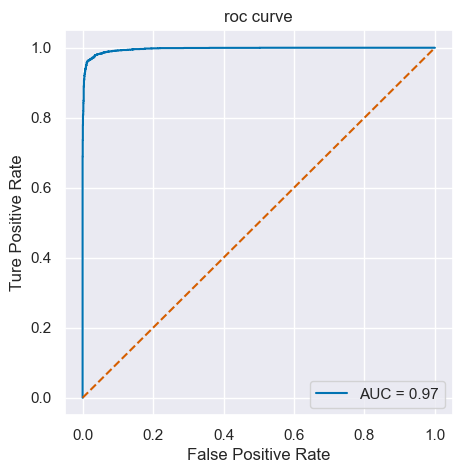

In [24]:
a=t.predict_proba(x_val)
a
c=list(a)
c11=[]
c12=[]
for i in c:
    c11.append(i[0])
    c12.append(i[1])

def plot_roc_curve(y_true, y_score):

    from sklearn.metrics import roc_curve 
    import matplotlib.pyplot as plt
    fpr,tpr,threshold = roc_curve (y_true, y_score, pos_label=1)
    plt.figure(figsize=(5, 5))
    plt.xlabel( 'False Positive Rate')
    plt.ylabel ('Ture Positive Rate')
    rocauc = auc(fpr1, tpr1)
    plt.title ('roc curve')
    plt.plot (fpr, tpr,color= 'b', label='AUC = %0.2f' % rocauc )
    plt.legend(loc='lower right')
    plt.plot ([0,1], [0,1], 'r--')
    plt.show()

plot_roc_curve(y_val,c12)

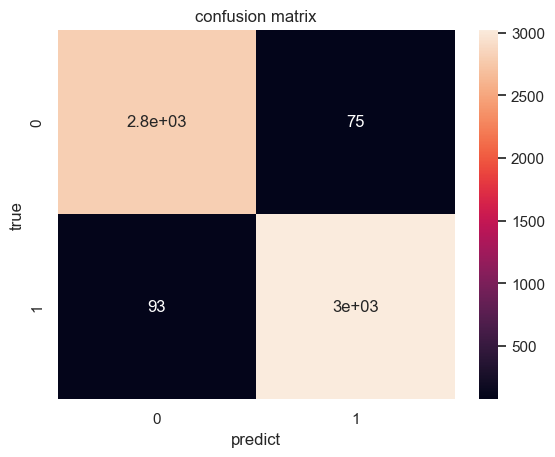

In [25]:
# Draw the confusion matrix
sns.set()
f,ax=plt.subplots()
c = confusion_matrix(y_val, resu, labels=[0,1])
sns.heatmap(c,annot=True,ax=ax) 
ax.set_title('confusion matrix') 
ax.set_ylabel('true') 
ax.set_xlabel('predict')
plt.show()

In [ ]:
# Decision tree model

In [26]:
df1=[]
for i in range(len(df)):
    s1_afv = avg_feature_vector(df[i], model=model, num_features=100, index2word_set=index2word_set)
    df1.append(s1_afv)

X=pd.DataFrame(df1)
X

gbc = GradientBoostingClassifier(n_estimators=20,random_state=2019, subsample=0.8, max_depth=5,min_samples_leaf=1,min_samples_split=6)

gbc.fit(X, y)

gbc_leaf = gbc.apply(X)
gbc_feats = gbc_leaf.reshape(-1,20)      
enc = OneHotEncoder()
enc.fit(gbc_feats)
X = np.array(enc.transform(gbc_feats).toarray())

fff=len(X[0])

X=pd.DataFrame(X)
X
X_train, x_val, y_train, y_val = train_test_split(X, y, test_size = 0.3, random_state = 272)

from sklearn.tree import  DecisionTreeClassifier
t=DecisionTreeClassifier(criterion='entropy',
                         )

t.fit(X_train, y_train)

resu = t.predict(x_val,)
fpr1, tpr1, threshold = roc_curve(y_val, resu)
rocauc1 = auc(fpr1, tpr1)
print('auc')
print(rocauc1)

from sklearn.metrics import accuracy_score , precision_score ,recall_score , f1_score

accuracy = accuracy_score(y_val, resu)

precision=precision_score(y_val, resu)

recall =  recall_score(y_val,resu)

f1 = f1_score(y_val,resu)
print('accuracy')
print(accuracy)
print('precision')
print(precision)
print('recall')
print(recall)
print('f1')
print(f1)

auc
0.5535724599561599
accuracy
0.5536666666666666
precision
0.5728444003964321
recall
0.5559474190445656
f1
0.5642694435405141


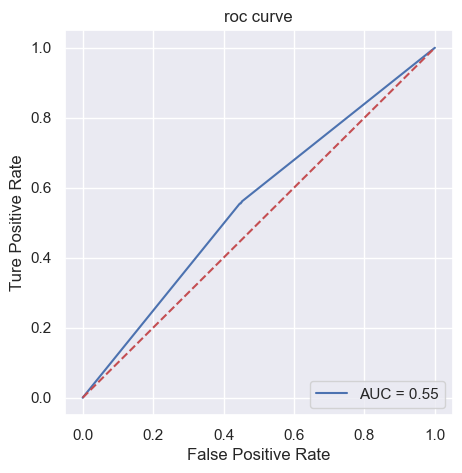

In [27]:
a=t.predict_proba(x_val)
a
c=list(a)
c11=[]
c12=[]
for i in c:
    c11.append(i[0])
    c12.append(i[1])

def plot_roc_curve(y_true, y_score):

    from sklearn.metrics import roc_curve 
    import matplotlib.pyplot as plt
    fpr,tpr,threshold = roc_curve (y_true, y_score, pos_label=1)
    plt.figure(figsize=(5, 5))
    plt.xlabel( 'False Positive Rate')
    plt.ylabel ('Ture Positive Rate')
    rocauc = auc(fpr1, tpr1)
    plt.title ('roc curve')
    plt.plot (fpr, tpr,color= 'b', label='AUC = %0.2f' % rocauc )
    plt.legend(loc='lower right')
    plt.plot ([0,1], [0,1], 'r--')
    plt.show()

plot_roc_curve(y_val,c12)

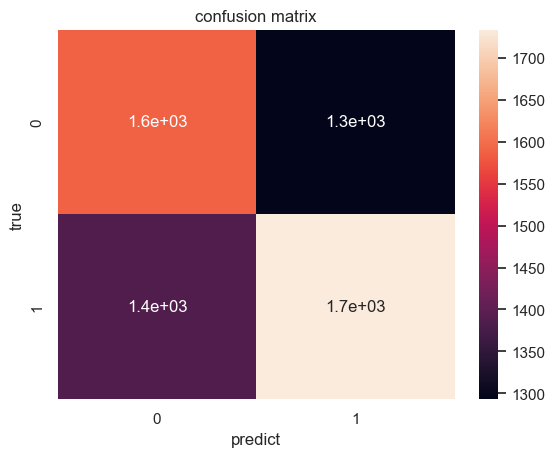

In [28]:
sns.set()
f,ax=plt.subplots()
c = confusion_matrix(y_val, resu, labels=[0,1])
sns.heatmap(c,annot=True,ax=ax) 
ax.set_title('confusion matrix') 
ax.set_ylabel('true') 
ax.set_xlabel('predict')
plt.show()